# dataprep example

This notebook will show how the functions contained within the dataprep module are used to generate hdf5 files for storing raw data and peak fitting results. This module is also the primary way in which the functions contained within spectrafit.py are utilized.

In [1]:
import os
import h5py
import matplotlib.pyplot as plt
from ramandecompy import dataprep

### dataprep.new_hdf5

The first function in the module simply generates a new `.hdf5` file in your active directory. The only input required is the desired name of the file. Typically, a user will want to generate two files: a `calibration.hdf5` and an `experiment,hdf5`. If a .hdf5 file with that name already exists, an error will be thrown.

In [2]:
dataprep.new_hdf5('dataprep_calibration')

OSError: Unable to create file (unable to open file: name = 'dataprep_calibration.hdf5', errno = 17, error message = 'File exists', flags = 15, o_flags = a02)

### dataprep.view_hdf5

The module contains a function (`dataprep.view_hdf5`) that will help display the groups and dataset contained within the `.hdf5` file. At this point, `dataprep_calibration.hdf5` is empty so only the filename is output. `dataprep.view_hdf5` displays groups in **bold** and datasets in a standard font.

In [3]:
dataprep.view_hdf5('dataprep_calibration.hdf5')

**** dataprep_calibration.hdf5 ****
Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    wavenumber
Methane
|    Peak_01
|    counts
|    wavenumber


### dataprep. add_calibration

There are two functions for adding data to a .hdf5 file. The first is `dataprep.add_calibration` and is used to add calibration data to a `calibration.hdf5`

In [4]:
dataprep.add_calibration('dataprep_calibration.hdf5',
                         '../ramandecompy/tests/test_files/Hydrogen_Baseline_Calibration.xlsx',
                         label='Hydrogen')

RuntimeError: Unable to create link (name already exists)

In [5]:
dataprep.view_hdf5('dataprep_calibration.hdf5')

**** dataprep_calibration.hdf5 ****
Hydrogen
|    Peak_01
|    Peak_02
|    Peak_03
|    Peak_04
|    counts
|    wavenumber
Methane
|    Peak_01
|    counts
|    wavenumber


Now using `dataprep.view_hdf5` we can see that our `dataprep_calibration_hdf5` file now contains one 1st order group named with our assigned label. This group contains 6 datasets. The first four datasets consist of of the six fit parameters defining the pseudo-Voigt profiles of each detected peak, along with a 7th value coresponding to the area under the curve of the pseudo-Voigt profile. The last two datasets are the raw x (wavenumber) and y (counts) values from the calibration spectra.  

Next we will add one more set of calibration data to `dataprep_calibration.hdf5`.

In [12]:
dataprep.add_calibration('dataprep_calibration.hdf5',
                         '../ramandecompy/tests/test_files/Methane_Baseline_Calibration.xlsx',
                         label='Methane')

OSError: Unable to open file (unable to open file: name = 'dataprep_calibration.hdf5', errno = 2, error message = 'No such file or directory', flags = 1, o_flags = 2)

In [18]:
dataprep.view_hdf5('dataprep_calibration.hdf5')


**** dataprep_calibration.hdf5 ****


OSError: Unable to open file (unable to open file: name = 'dataprep_calibration.hdf5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

Using `dataprep.view_hdf5` we can now see that both **Hydrogen** and **Methane** groups are contained within the file. The detected and fitted peak profiles are saved under each group along with the raw data. In this way, we see how multiple calibration data can be stored within a single `calibration.hdf5`.  

### dataprep.add_experiment

Next we will see how the slighly different function `dataprep.add_experiment` operates and how it stores experimental data under groups that specify the temperature and residence time for each experiment added. First we will make a new `experiment.hdf5` file to store the experimental data. Importing this file will take longer than the earlier examples since this spectra contains a larger number of peaks that need to be fit. 

In [19]:
#dataprep.new_hdf5('dataprep_experiment')
#dataprep.add_experiment('dataprep_experiment.hdf5', '../ramandecompy/tests/test_files/FA_3.6wt%_300C_25s.csv')
#dataprep.add_experiment('dataprep_experiment.hdf5', '../ramandecompy/tests/test_files/FA_3.6wt%_300C_35s.csv')
dataprep.add_experiment('dataprep_experiment.hdf5', '../ramandecompy/tests/test_files/FA_3.6wt%_400C_5s.csv')

In [20]:
dataprep.view_hdf5('dataprep_experiment.hdf5')

**** dataprep_experiment.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    wavenumber
|    35s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    wavenumber
400C
|    5s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    | 

### dataprep.plot_fit

The last function is the module is `dataprep.plot_fit` which allows for a visual inspection of the detected peak locations for any spectra saved in a `.hdf5`. This gives the user an opportunity not only to view the spectra data, but also to verify that all peaks were correctly identified as part of the fitting process.

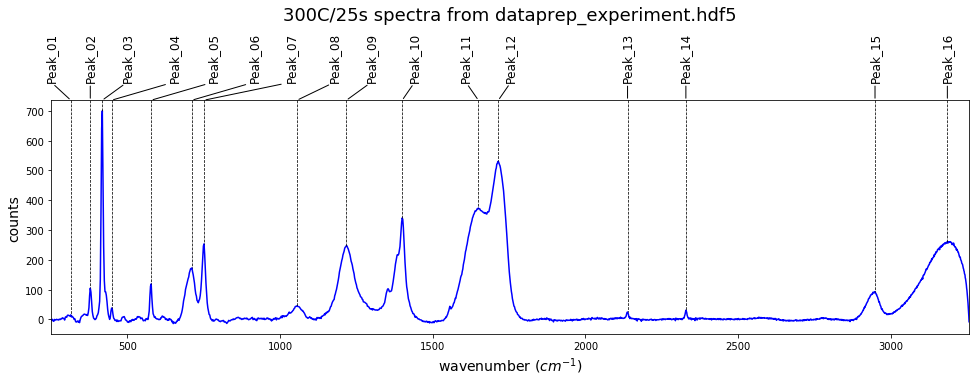

In [14]:
fig, ax = dataprep.plot_fit('dataprep_experiment.hdf5', '300C/25s')

### dataprep.adjust_peaks

In order to give the user the ability to apply their expert knowledge, this function allows peaks to be added and subtracted from the automatically generated fit. In this way, more difficult to parse compound peaks can be fit more accurately, which will be critical for future chemical yield calculations.

In [15]:
# the add_list argument consists of a list of integer wavenumbers where the peak should approximately be
# the function allows the fit to adjust the center of the peak +/- 10 cm^-1
add_list = [1270, 1350, 1385]
# the drop_list argument consists of the string labels of the datasets/labels shown in the hdf5 file and
# the plot produced using dataprep.plot_fit
drop_list = ['Peak_01']

dataprep.adjust_peaks('dataprep_experiment.hdf5', '300C/25s', add_list, drop_list, plot_fits=True)

AttributeError: module 'ramandecompy.dataprep' has no attribute 'adjust_peaks'

Running the dataprep.plot_fit function again we see that Peak_01 has been removed and Peak_09, Peak_10, and Peak_11 have been added to fit fit. These three added peaks contain a `*` in their label to identify them as manually added to the fit.

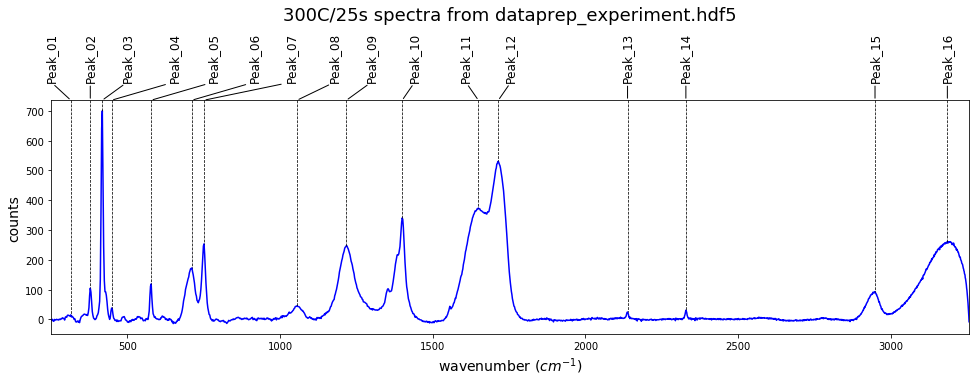

In [16]:
fig, ax = dataprep.plot_fit('dataprep_experiment.hdf5', '300C/25s')

In order to keep the file system clean, and to avoid errors associated with running this notebook multiple times, we lastly will delete the two `.hdf5` files generated by this notebook. Comment out the final cell if you wish you explore these files further. 

In [17]:
os.remove('dataprep_calibration.hdf5')
os.remove('dataprep_experiment.hdf5')

FileNotFoundError: [Errno 2] No such file or directory: 'dataprep_calibration.hdf5'